# Data Acquisition

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
pd.set_option('display.max_columns',None)
pd.set_option('display.max_columns',50)


def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)

In [90]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"
filename = "laptops.csv"
download(url, filename)

## Read File

In [93]:
df = pd.read_csv(filename, header=None)
print(df.head())

     0   1          2   3   4   5       6    7   8    9     10    11
0  Acer   4  IPS Panel   2   1   5   35.56  1.6   8  256   1.6   978
1  Dell   3    Full HD   1   1   3  39.624  2.0   4  256   2.2   634
2  Dell   3    Full HD   1   1   7  39.624  2.7   8  256   2.2   946
3  Dell   4  IPS Panel   2   1   5  33.782  1.6   8  128  1.22  1244
4    HP   4    Full HD   2   1   7  39.624  1.8   8  256  1.91   837


In [231]:
headers = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_CM", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg","Price"]

In [233]:
df.columns = headers

# Data Preprocessing before EDA

## Data Overview

In [236]:
df.head(20)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.20,1016
6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.10,1117
7,Acer,3,IPS Panel,2,1,5,38.100,1.6,4,256,2.20,866
8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.30,812
9,Acer,3,IPS Panel,3,1,7,38.100,1.8,8,256,2.20,1068


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_CM  238 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       238 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB


In [240]:
df.shape

(238, 12)

In [242]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_CM', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [244]:
df.nunique()

Manufacturer       11
Category            5
Screen              2
GPU                 3
OS                  2
CPU_core            3
Screen_Size_CM     10
CPU_frequency      11
RAM_GB              5
Storage_GB_SSD      2
Weight_kg          78
Price             193
dtype: int64

In [246]:
df["CPU_frequency"].value_counts()

CPU_frequency
2.5    71
2.7    43
1.6    30
2.8    25
1.8    23
2.6    11
2.3    11
2.4    10
2.0     9
2.9     4
1.2     1
Name: count, dtype: int64

In [248]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [250]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [252]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_CM    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [254]:
for column in df.columns:
    print(f'Unique values in {column}: {df[column].unique()}')

Unique values in Manufacturer: ['Acer' 'Dell' 'HP' 'Asus' 'Lenovo' 'Huawei' 'Toshiba' 'MSI' 'Razer'
 'Samsung' 'Xiaomi']
Unique values in Category: [4 3 1 5 2]
Unique values in Screen: ['IPS Panel' 'Full HD']
Unique values in GPU: [2 1 3]
Unique values in OS: [1 2]
Unique values in CPU_core: [5 3 7]
Unique values in Screen_Size_CM: [35.56       39.624      33.782      38.1        33.02       43.942
 43.18       31.75       30.48       37.26961538]
Unique values in CPU_frequency: [1.6 2.  2.7 1.8 2.5 2.4 2.8 1.2 2.9 2.6 2.3]
Unique values in RAM_GB: [ 8  4  6 16 12]
Unique values in Storage_GB_SSD: [256 128]
Unique values in Weight_kg: [1.6        2.2        1.22       1.91       2.1        2.3
 2.13       2.         1.7        1.4        1.86       1.88
 1.63       1.83       1.96       1.21       2.65       1.25
 1.38       1.86223176 1.3        1.58       2.5        1.75
 1.48       3.         1.05       1.12       1.2        2.56
 3.6        1.41       2.05       1.95       3.42    

## Handling Missing Values

Here I found "?" to be unknown hence replacing it with np.NaN

In [259]:
df.replace("?", np.NaN, inplace = True)

Checking for Non- Numeric Values in Numeric columns

In [262]:
for column in df.select_dtypes(include=[np.number]).columns:
        non_numeric = df[pd.to_numeric(df[column], errors='coerce').isna()]
        if not non_numeric.empty:
            print(f'Non-numeric values in {column}:\n', non_numeric)

There are no non numeric values in any numeric columns

In [264]:
df.describe(include = "all")

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
unique,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,2.946184,0.411393,2.482603,34.765316,0.489090,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.472500,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.862232,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000


## Data Formatting

Here Screen_Size_inch, Weight_kg should be of float type hence converting their data type

In [266]:
df["Screen_Size_CM"] = df["Screen_Size_CM"].astype("float64")

In [268]:
df["Weight_kg"] = df["Weight_kg"].astype("float64")

In [270]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_CM    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

Checking for Non- Numeric Values in Numeric columns

In [275]:
for column in df.select_dtypes(include=[np.number]).columns:
        non_numeric = df[pd.to_numeric(df[column], errors='coerce').isna()]
        if not non_numeric.empty:
            print(f'Non-numeric values in {column}:\n', non_numeric)

Checking for NULL Values

In [277]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

## Data Cleaning

In [282]:
mode_Screen_Size_CM = df["Screen_Size_CM"].mode()
mode_Screen_Size_CM
# we see values in Screen_Size_inch are categorical in nature hence we replce NaN with most frequent value

0    39.624
Name: Screen_Size_CM, dtype: float64

In [288]:
df["Screen_Size_CM"].replace(np.NaN,mode_Screen_Size_CM[0], inplace = True)

In [290]:
mean_Weight_kg = df["Weight_kg"].mean()

In [292]:
df["Weight_kg"].replace(np.NaN,mean_Weight_kg, inplace = True)

In [294]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

## Writing the New File to another CSV File

In [538]:
file_path = "/Users/vythreynarayanam/Downloads/Laptop_Pricing/eda_with_python_laptop_pricing/laptop_pricing.csv"

In [540]:
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"Deleted existing file: {file_path}")

Deleted existing file: /Users/vythreynarayanam/Downloads/Laptop_Pricing/eda_with_python_laptop_pricing/laptop_pricing.csv


In [542]:
df.to_csv(file_path, index = False)

In [544]:
laptop_pricing = pd.read_csv("/Users/vythreynarayanam/Downloads/Laptop_Pricing/eda_with_python_laptop_pricing/laptop_pricing.csv")

In [546]:
laptop_pricing.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [548]:
laptop_pricing.describe(include ="all")

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
unique,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,2.946184,0.411393,2.482603,34.765316,0.489090,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.472500,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.862232,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000


## Converting cm to inches, kg to pounds as required for this analysis(Data Formatting)

In [551]:
laptop_pricing["Weight_kg"] = laptop_pricing["Weight_kg"] * 2.205

In [553]:
laptop_pricing.rename(columns={"Weight_kg":"Weight_pounds"}, inplace = True)

In [555]:
laptop_pricing["Screen_Size_CM"] = laptop_pricing["Screen_Size_CM"] / 2.54

In [557]:
laptop_pricing.rename(columns={"Screen_Size_CM":"Screen_Size_inches"}, inplace = True)

In [559]:
laptop_pricing.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inches,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,4.21155,837


In [561]:
laptop_pricing.nunique()

Manufacturer           11
Category                5
Screen                  2
GPU                     3
OS                      2
CPU_core                3
Screen_Size_inches     10
CPU_frequency          11
RAM_GB                  5
Storage_GB_SSD          2
Weight_pounds          78
Price                 193
dtype: int64

## Binning and Visualization

In [564]:
Price_Bins = np.linspace(laptop_pricing["Price"].min(),laptop_pricing["Price"].max(), 4)

In [566]:
Price_Labels = ["low","medium","high"]

In [568]:
laptop_pricing["Price_Binned"] = pd.cut(laptop_pricing["Price"],Price_Bins, labels = Price_Labels )

In [570]:
laptop_pricing["Price_Binned"] 

0         low
1         low
2         low
3         low
4         low
        ...  
233    medium
234    medium
235    medium
236       low
237       low
Name: Price_Binned, Length: 238, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

[Text(0, 0, '159'), Text(0, 0, '72'), Text(0, 0, '6')]

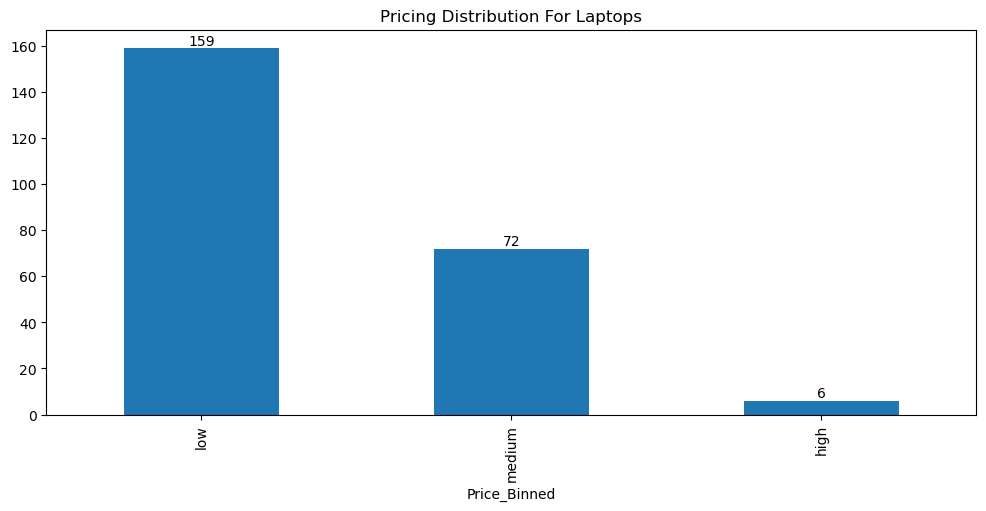

In [572]:
plt.figure(figsize=(12, 5))
graph_for_Price_Binned = laptop_pricing["Price_Binned"] .value_counts().plot(kind='bar',title ="Pricing Distribution For Laptops")
graph_for_Price_Binned.bar_label(graph_for_Price_Binned.containers[0], label_type='edge')

## One Hot Encoding

In [574]:
laptop_pricing.dtypes

Manufacturer            object
Category                 int64
Screen                  object
GPU                      int64
OS                       int64
CPU_core                 int64
Screen_Size_inches     float64
CPU_frequency          float64
RAM_GB                   int64
Storage_GB_SSD           int64
Weight_pounds          float64
Price                    int64
Price_Binned          category
dtype: object

checking the non numeric or categorical variables

In [577]:
laptop_pricing.select_dtypes(exclude=['float64','int64'])

,Manufacturer,Screen,Price_Binned
0,Acer,IPS Panel,low
1,Dell,Full HD,low
2,Dell,Full HD,low
3,Dell,IPS Panel,low
4,HP,Full HD,low
...,...,...,...
233,Lenovo,IPS Panel,medium
234,Toshiba,Full HD,medium
235,Lenovo,IPS Panel,medium
236,Lenovo,Full HD,low


In [579]:
laptop_pricing.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_inches', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_pounds', 'Price', 'Price_Binned'],
      dtype='object')

In [581]:
Columns_needed_to_create_dummies = laptop_pricing.select_dtypes(exclude=['float64','int64']).columns 

In [583]:
Columns_needed_to_create_dummies

Index(['Manufacturer', 'Screen', 'Price_Binned'], dtype='object')

In [534]:
for var in Columns_needed_to_create_dummies:
    cat_list = pd.get_dummies(laptop_pricing[var], prefix=var)
    existing_dummy_columns = [col for col in laptop_pricing.columns if col.startswith(var + '_')]
    if existing_dummy_columns:
        laptop_pricing = laptop_pricing.drop(columns=existing_dummy_columns)
    laptop_pricing_with_dummies = laptop_pricing.join(cat_list)
    laptop_pricing = laptop_pricing_with_dummies
cat_vars = Columns_needed_to_create_dummies
data_vars=laptop_pricing.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
laptop_pricing_final=laptop_pricing[to_keep]
laptop_pricing_final.columns.values

array(['Category', 'GPU', 'OS', 'CPU_core', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price', 'Manufacturer_Acer',
       'Manufacturer_Asus', 'Manufacturer_Dell', 'Manufacturer_HP',
       'Manufacturer_Huawei', 'Manufacturer_Lenovo', 'Manufacturer_MSI',
       'Manufacturer_Razer', 'Manufacturer_Samsung',
       'Manufacturer_Toshiba', 'Manufacturer_Xiaomi', 'Screen_Full HD',
       'Screen_IPS Panel', 'Price_Binned_low', 'Price_Binned_medium',
       'Price_Binned_high'], dtype=object)